<a href="https://colab.research.google.com/github/TDStriker/Projects-in-ML/blob/main/ML_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Processing - https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

For this project I intend to make a model that performs regression to predict the price of a house

In [500]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random

In [501]:
data = pd.read_csv('data/housing_price_dataset.csv')

In [502]:
#Converting categorical data into qualitative data
le = LabelEncoder()
data['Neighborhood'] = le.fit_transform(data['Neighborhood']) #home = 0, health = 1, other = 2, services = 3, teacher = 4
print("Rural,Suburb,Urban:",le.transform(['Rural','Suburb','Urban']))

Rural,Suburb,Urban: [0 1 2]


In [503]:
print(data)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1             0       1969  215355.283618
1            2459         3          2             0       1980  195014.221626
2            1860         2          1             1       1970  306891.012076
3            2294         2          1             2       1996  206786.787153
4            2130         5          2             1       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3             0       1975  100080.865895
49996        2854         2          2             1       1988  374507.656727
49997        2979         5          3             1       1962  384110.555590
49998        2596         5          2             0       1984  380512.685957
49999        1572         5          3             0       2011  221618.583218

[50000 rows x 6 columns]


In [504]:
print(data['Bedrooms'].value_counts())
print(data['Bathrooms'].value_counts())
print(data['Neighborhood'].value_counts())
print(data['YearBuilt'].value_counts())

3    12661
5    12468
2    12436
4    12435
Name: Bedrooms, dtype: int64
1    16755
2    16719
3    16526
Name: Bathrooms, dtype: int64
1    16721
0    16676
2    16603
Name: Neighborhood, dtype: int64
1968    777
1977    742
1983    741
1967    729
1999    728
       ... 
1950    643
2016    642
2006    640
2012    638
2001    621
Name: YearBuilt, Length: 72, dtype: int64


In [505]:
data.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


In [506]:
feet = data.sort_values(by=['SquareFeet'])
bed = data.sort_values(by=['Bedrooms'])
bath = data.sort_values(by=['Bathrooms'])
neigh = data.sort_values(by=['Neighborhood'])
year = data.sort_values(by=['YearBuilt'])

<Axes: xlabel='YearBuilt'>

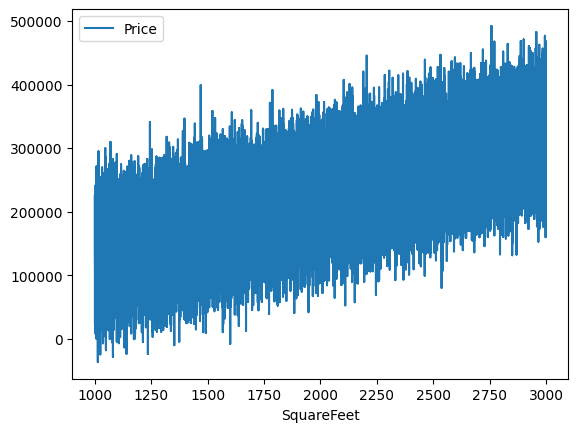

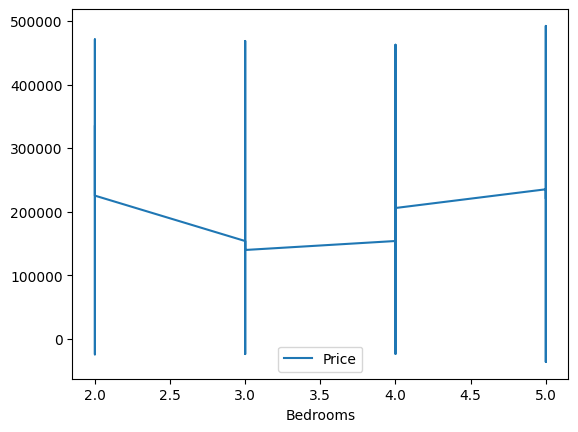

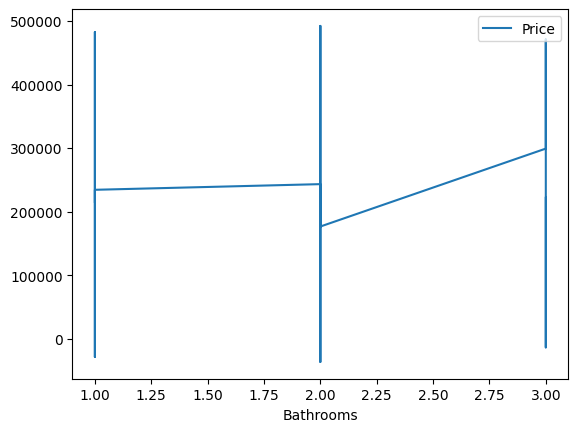

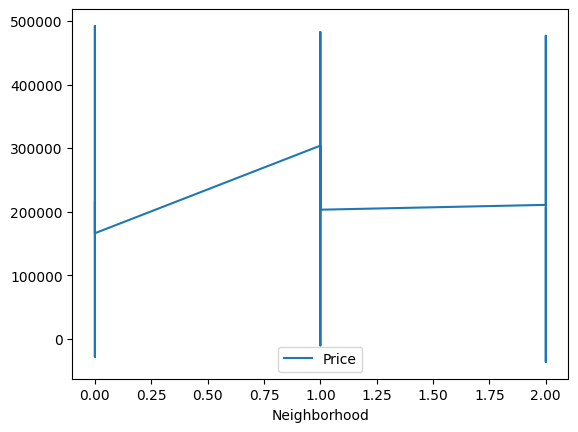

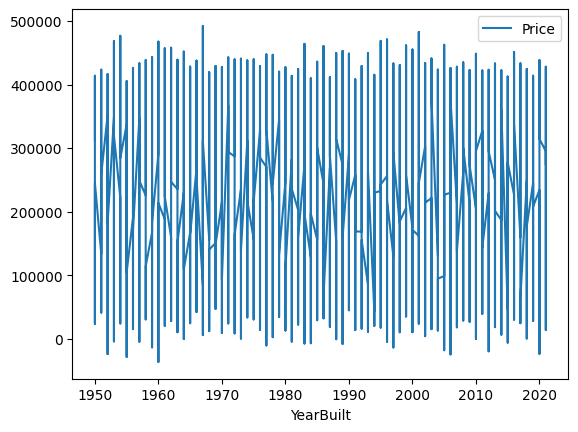

In [507]:
feet.plot(x='SquareFeet',y='Price')
bed.plot(x='Bedrooms',y='Price')
bath.plot(x='Bathrooms',y='Price')
neigh.plot(x='Neighborhood',y='Price')
year.plot(x='YearBuilt',y='Price')

In [508]:
#Normalize larger quantities
norm = data.copy()

col = 'SquareFeet'
norm[col] = norm[col] /norm[col].abs().max()
col = 'YearBuilt'
norm[col] = norm[col] /norm[col].abs().max()

# view normalized data
display(norm)
data=norm

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.708903,4,1,0,0.974270,215355.283618
1,0.819940,3,2,0,0.979713,195014.221626
2,0.620207,2,1,1,0.974765,306891.012076
3,0.764922,2,1,2,0.987630,206786.787153
4,0.710237,5,2,1,0.990104,272436.239065
...,...,...,...,...,...,...
49995,0.427476,5,3,0,0.977239,100080.865895
49996,0.951651,2,2,1,0.983671,374507.656727
49997,0.993331,5,3,1,0.970807,384110.555590
49998,0.865622,5,2,0,0.981692,380512.685957


In [509]:
#Train-dev-test split
#80-10-10 split
size = len(data)
shuffle = data.sample(frac = 1)
partt = int(size*8/10)
partv = int(size*9/10)
test = shuffle.iloc[partv:]
valid = shuffle.iloc[partt:partv]
train = shuffle.iloc[:partt]

In [510]:
#Feature Label split
train_label = train["Price"].to_numpy()
train_feat = train.drop(columns=["Price"]).to_numpy()
test_label = test["Price"].to_numpy()
test_feat = test.drop(columns=["Price"]).to_numpy()
valid_label = valid["Price"].to_numpy()
valid_feat = valid.drop(columns=["Price"]).to_numpy()

Part 1

In [511]:
def relu(X):
  return np.where(X < 0, 0, X)

In [512]:
def relu_deriv(X):
  return np.where(X < 0, 0, 1)

In [513]:
class NeuralNetwork:
  def __init__(self,in_dim,out_dim,learning_rate,layer_size,num_hidden_layers=1):
    self.num_hidden_layers = num_hidden_layers
    self.num_layers = num_hidden_layers+2
    self.layer_size = layer_size
    self.learning_rate=learning_rate

    self.inputs = [0]*self.num_layers

    #COnstruct the layers of the network
    self.layers = [0]*self.num_layers
    self.layers[0] = [0]*layer_size
    self.layers[-1] = [0]*out_dim
    for i in range(layer_size):
          self.layers[0][i]=[random.random() for j in range(in_dim+1)]
    for i in range(out_dim):
          self.layers[-1][i]=[random.random() for j in range(layer_size+1)]
    for i in range(0,num_hidden_layers):
      self.layers[i+1]=[0]*layer_size
      for j in range(layer_size):
        self.layers[i+1][j]=[random.random() for k in range(layer_size+1)]

    self.in_dim = in_dim
    self.out_dim = out_dim

  #Helper function to compute output of a single layer
  def compute_layer(self,X,layer):
    if(layer<self.num_layers-1):
      out = [0]*self.layer_size

      for i in range(self.layer_size):
        out[i]=np.dot(X,np.transpose(self.layers[layer][i])[:-1])+np.transpose(self.layers[layer][i])[-1]
        out[i]=relu(out[i])
    else:
      out = [0]*self.out_dim

      for i in range(self.out_dim):
        out[i]=np.dot(X,np.transpose(self.layers[layer][i])[:-1])+np.transpose(self.layers[layer][i])[-1]

    return np.transpose(out)

  def forward(self,x):
    for i in range(self.num_layers):
      self.inputs[i]=x

      x = self.compute_layer(x,i)

    return x

  def backward(self,y_pred,y):
    dif = np.reshape(y_pred,[len(y_pred),1])-np.reshape(y,[len(y_pred),1])
    weights = np.transpose(np.transpose(self.layers[-1])[:-1])
    bias = np.transpose(np.transpose(self.layers[-1])[-1])

    for i in range(len(dif)):
      bias -= self.learning_rate * dif[i]

    error = np.dot(dif, weights)
    werror = np.dot(np.transpose(self.inputs[-1]), dif)

    weights -= self.learning_rate * np.transpose(werror) #transpose might be wrong

    self.layers[-1]=np.concatenate((weights,np.transpose([bias])),axis=1)

    for i in range(self.num_layers-2,-1,-1):
      weights = np.transpose(np.transpose(self.layers[i])[:-1])
      bias = np.transpose(np.transpose(self.layers[i])[-1])

      for j in range(len(error)):
        bias -= self.learning_rate * error[j]

      werror = np.dot(np.transpose(self.inputs[i]), error)
      error = np.dot(error, weights)

      weights -= self.learning_rate * np.transpose(werror)

      self.layers[i]=np.concatenate((weights,np.transpose([bias])),axis=1)

  def train(self,features,labels,epochs):
    for ep in range(epochs):
      pred = self.forward(features)

      c = self.cost(pred,labels)

      self.backward(pred,labels)

      print('Epoch %d: MSE=%f' % (ep+1,c))


  #Cost function using Mean Absolute Error
  def cost(self,pred,target):
    c = 0

    for i in range(len(pred)):
      c += abs(pred[i]-target[i])
    c/=len(pred)

    return c

  def predict(self,data):
    return self.forward(data)


In [514]:
model = NeuralNetwork(2,1,1e-3,5,2)

In [515]:
#mock data for testing
features = np.array([[1,0],[0,0],[0,1],[1,1],[1,0],[1,1],[1,1],[0,1],[0,0],[0,1],[1,0]])
labels = np.array([1,0,1,0,1,0,0,1,0,1,1])
model.train(features,labels,50)


Epoch 1: MSE=27.622242
Epoch 2: MSE=3.259130
Epoch 3: MSE=0.529520
Epoch 4: MSE=0.491436
Epoch 5: MSE=0.479627
Epoch 6: MSE=0.472209
Epoch 7: MSE=0.467636
Epoch 8: MSE=0.464834
Epoch 9: MSE=0.463106
Epoch 10: MSE=0.462019
Epoch 11: MSE=0.461312
Epoch 12: MSE=0.461065
Epoch 13: MSE=0.461067
Epoch 14: MSE=0.461004
Epoch 15: MSE=0.460898
Epoch 16: MSE=0.460764
Epoch 17: MSE=0.460611
Epoch 18: MSE=0.460448
Epoch 19: MSE=0.460277
Epoch 20: MSE=0.460104
Epoch 21: MSE=0.459929
Epoch 22: MSE=0.459755
Epoch 23: MSE=0.459582
Epoch 24: MSE=0.459411
Epoch 25: MSE=0.459242
Epoch 26: MSE=0.459076
Epoch 27: MSE=0.458913
Epoch 28: MSE=0.458753
Epoch 29: MSE=0.458597
Epoch 30: MSE=0.458443
Epoch 31: MSE=0.458316
Epoch 32: MSE=0.458288
Epoch 33: MSE=0.458261
Epoch 34: MSE=0.458238
Epoch 35: MSE=0.458220
Epoch 36: MSE=0.458208
Epoch 37: MSE=0.458203
Epoch 38: MSE=0.458204
Epoch 39: MSE=0.458211
Epoch 40: MSE=0.458226
Epoch 41: MSE=0.458247
Epoch 42: MSE=0.458275
Epoch 43: MSE=0.458310
Epoch 44: MSE=0.458

Part 2

Task 1

Used the provided link for setting up the pytorch framework: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Used the information from this forum to create a variable number of hidden layers in the model: https://discuss.pytorch.org/t/append-for-nn-sequential-or-directly-converting-nn-modulelist-to-nn-sequential/7104

Researched but didn't end up using:

Reshape: https://pytorch.org/docs/stable/generated/torch.reshape.html

Argmax: https://pytorch.org/docs/stable/generated/torch.argmax.html

Change datatype of tensor: https://pytorch.org/docs/stable/generated/torch.Tensor.to.html

Task 2

In [516]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [517]:
class PTNetwork(nn.Module):
    def __init__(self,in_dim,out_dim,layer_size,num_hidden_layers=1):
        super().__init__()
        self.in_dim = in_dim
        self.num_hidden_layers = num_hidden_layers
        self.num_layers = num_hidden_layers*2+3
        self.layer_size = layer_size

        self.flatten = nn.Flatten()

        modules = []
        modules.append(nn.Linear(in_dim, layer_size))
        modules.append(nn.ReLU())
        for i in range(num_hidden_layers):
          modules.append(nn.Linear(layer_size, layer_size))
          modules.append(nn.ReLU())
        modules.append(nn.Linear(layer_size, out_dim))

        self.layers = nn.Sequential(*modules)

    def forward(self, x):
        return self.layers(x)

In [518]:
#Hyperparameters
learning_rate=1e-3
layer_size=500
num_hidden_layers=2
batch_size = 64
epochs = 10

in_dim = 5
out_dim=1

In [519]:
#Hyperparameters
learning_rate=1e-3
layer_size=200
num_hidden_layers=2
batch_size = 75
epochs = 10

in_dim = 5
out_dim=1

In [520]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

model = PTNetwork(in_dim,out_dim,layer_size,num_hidden_layers)

# Initialize the loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [521]:
def load_data(feats,labels):
  segments = int(len(feats)/batch_size + .999)
  out = [0]*segments
  for i in range(segments):
    out[i]=np.array([feats[i*batch_size:(i+1)*batch_size],labels[i*batch_size:(i+1)*batch_size],i])
  return np.array(out)

In [522]:
def train_loop(feats,labels, model, loss_fn, optimizer):
    size = len(feats)

    model.train()
    for (X, y, batch) in load_data(feats,labels):
        # Compute prediction and loss
        X = torch.tensor(X.astype(np.float32))
        y = torch.tensor(y.astype(np.float32))

        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(feats,labels, model, loss_fn):
    model.eval()
    size = len(feats)
    num_batches = int((len(feats)/batch_size)+.999)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y, _ in load_data(feats,labels):
            X = torch.tensor(X.astype(np.float32))
            y = torch.tensor(y.astype(np.float32))

            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Avg loss: {test_loss:>8f} \n")

In [523]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_feat,train_label, model, loss_fn, optimizer)
    test_loop(valid_feat,valid_label, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 232983.890625  [   75/40000]


<ipython-input-521-1b8ba5702f13>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out[i]=np.array([feats[i*batch_size:(i+1)*batch_size],labels[i*batch_size:(i+1)*batch_size],i])
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([75])) that is different to the input size (torch.Size([75, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss: 205676.109375  [ 7575/40000]
loss: 82667.476562  [15075/40000]
loss: 77249.648438  [22575/40000]
loss: 58923.519531  [30075/40000]
loss: 65351.441406  [37575/40000]
Avg loss: 68254.609317 

Epoch 2
-------------------------------
loss: 69694.367188  [   75/40000]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss: 65886.992188  [ 7575/40000]
loss: 75331.093750  [15075/40000]
loss: 75350.281250  [22575/40000]
loss: 56670.664062  [30075/40000]
loss: 63023.371094  [37575/40000]
Avg loss: 66065.428988 

Epoch 3
-------------------------------
loss: 67432.421875  [   75/40000]
loss: 63987.710938  [ 7575/40000]
loss: 73555.531250  [15075/40000]
loss: 73746.578125  [22575/40000]
loss: 54933.968750  [30075/40000]
loss: 60847.218750  [37575/40000]
Avg loss: 64218.750408 

Epoch 4
-------------------------------
loss: 65778.890625  [   75/40000]
loss: 62401.929688  [ 7575/40000]
loss: 72305.906250  [15075/40000]
loss: 72592.601562  [22575/40000]
loss: 53765.972656  [30075/40000]
loss: 59226.253906  [37575/40000]
Avg loss: 63044.728953 

Epoch 5
-------------------------------
loss: 64822.613281  [   75/40000]
loss: 61527.265625  [ 7575/40000]
loss: 71776.039062  [15075/40000]
loss: 72062.789062  [22575/40000]
loss: 53190.183594  [30075/40000]
loss: 58415.371094  [37575/40000]
Avg loss: 62564.039646 

I am using the ReLU activation function. I have hyperparameters for batch size, layer size, number of layers, epochs, and learning_rate

Normalization drastically helped with this task. I originally tried running it using Mean Squared Error and without normalization, which causing the loss to reach such a high level that the entire model failed.

In [524]:
test_loop(test_feat,test_label, model, loss_fn)

Avg loss: 61526.402927 



<ipython-input-521-1b8ba5702f13>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out[i]=np.array([feats[i*batch_size:(i+1)*batch_size],labels[i*batch_size:(i+1)*batch_size],i])


Task 3

I started with hyperparameters based off of the ones used for the MNIST PyTorch example. I tried increasing some of the values such as layer size and number of layers, however that didn't make any significant change in the average loss of the model. Following that, I decide to decrease layer size instead from 500 to 40 in order to improve runtime and efficiency, and I built it back up from there to a layer size of 200.

I used normalization on two of the input values so that the initial loss values would not be exorbitantly high.

I used the Adam optimization algorithm since SGD was not learning well for the regression task.